<a href="https://colab.research.google.com/github/Arashlf/UT_ML_Course/blob/main/Homework4/Q5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML: Homework 5 - Question 6 and 6
## Arash Latifi - 810197576
### Srping 2022

---

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RepeatedStratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Q5) Q5.CSV

The linear, polynomial and RBF are simply different in case of making the hyperplane decision boundary between the classes.

Usually linear and polynomial kernels are *less time consuming* and provides *less accuracy* than the rbf kernels.

**Linear**: The linear kernel works fine if your dataset if linearly separable.

**Polynomial**: It is quite popular in natural language processing (NLP). The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems.

**Radial basis function kernel**: It is commonly used in support vector machine classification. It uses when dataset is non-linear and can’t find out the right feature transform or the right kernel to use.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Arashlf/UT_ML_Course/main/Homework4/q5.csv')

In [ ]:
df.head(3)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0


In [ ]:
X = df.drop('target_class', axis=1)
y = df['target_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### RBF with C = 1, 100, 1000

In [ ]:
svclassifier_rbf_1 = SVC(kernel='rbf', C=1)
svclassifier_rbf_1.fit(X_train, y_train)
svclassifier_rbf_100 = SVC(kernel='rbf', C=100)
svclassifier_rbf_100.fit(X_train, y_train)
svclassifier_rbf_1000 = SVC(kernel='rbf', C=1000)
svclassifier_rbf_1000.fit(X_train, y_train)

SVC(C=1000)

In [ ]:
y_pred_rbf_1 = svclassifier_rbf_1.predict(X_test)
y_pred_rbf_100 = svclassifier_rbf_100.predict(X_test)
y_pred_rbf_1000 = svclassifier_rbf_1000.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_rbf_1))
print(accuracy_score(y_test,y_pred_rbf_100))
print(accuracy_score(y_test,y_pred_rbf_1000))

0.9751396648044692
0.979050279329609
0.9815642458100559


### Linear with C = 1, 100, 1000

In [ ]:
svclassifier_linear_1 = SVC(kernel='linear', C=1)
svclassifier_linear_1.fit(X_train, y_train)
svclassifier_linear_100 = SVC(kernel='linear', C=100)
svclassifier_linear_100.fit(X_train, y_train)
svclassifier_linear_1000 = SVC(kernel='linear', C=1000)
svclassifier_linear_1000.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

In [ ]:
y_pred_linear_1 = svclassifier_linear_1.predict(X_test)
y_pred_linear_100 = svclassifier_linear_100.predict(X_test)
y_pred_linear_1000 = svclassifier_linear_1000.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_linear_1))
print(accuracy_score(y_test,y_pred_linear_100))
print(accuracy_score(y_test,y_pred_linear_1000))

0.9801675977653631
0.9801675977653631
0.979050279329609


### Polynomial with C = 1, 100

In [ ]:
svclassifier_poly_1 = SVC(kernel='poly', C=1)
svclassifier_poly_1.fit(X_train, y_train)
svclassifier_poly_100 = SVC(kernel='poly', C=100)
svclassifier_poly_100.fit(X_train, y_train)

SVC(C=100, kernel='poly')

In [ ]:
y_pred_poly_1 = svclassifier_poly_1.predict(X_test)
y_pred_poly_100 = svclassifier_poly_100.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_poly_1))
print(accuracy_score(y_test,y_pred_poly_100))

0.9745810055865922
0.9770949720670391


### Sigmoid with C = 1, 100

In [ ]:
svclassifier_sigmoid_1 = SVC(kernel='sigmoid', C=1)
svclassifier_sigmoid_1.fit(X_train, y_train)
svclassifier_sigmoid_100 = SVC(kernel='sigmoid', C=100)
svclassifier_sigmoid_100.fit(X_train, y_train)

SVC(C=100, kernel='sigmoid')

In [ ]:
y_pred_sigmoid_1 = svclassifier_sigmoid_1.predict(X_test)
y_pred_sigmoid_100 = svclassifier_sigmoid_100.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_sigmoid_1))
print(accuracy_score(y_test,y_pred_sigmoid_100))

0.9268156424581006
0.9231843575418994


### Results:
| Kernel  | C    | Accuracy |
| ---     | ---  | ---    |
| RBF     | 1    | 0.9751 |
| RBF     | 100  | 0.9791 |
| RBF     | 1000 | 0.9816 |
| Linear  | 1    | 0.9802 |
| Linear  | 100  | 0.9802 |
| Linear  | 1000 | 0.9791 |
| Poly    | 1    | 0.9746 |
| Poly    | 100  | 0.9771 |
| Sigmoid | 1    | 0.9268 |
| Sigmoid | 100  | 0.9232 |

According to the table, the best estimator is Linear with paramet C=1 (or C=100).

### Grid Search)

In [ ]:
# defining parameter range
param_grid_rbf = {'C': [1, 10, 100, 500],
                  'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
                  'kernel': ['rbf']}
param_grid_linear = {'C': [1, 10, 100, 1000],
                  'kernel': ['linear']}
param_grid_poly = {'C': [1, 10, 100, 500],
                  'gamma': [0.01, 0.03, 0.05],
                  'degree': [2, 3, 4],
                  'kernel': ['poly']}

#### RBF:

In [ ]:
grid_rbf = GridSearchCV(SVC(), param_grid_rbf, refit = True, verbose = 3)
grid_rbf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.911 total time=  18.2s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.910 total time=  17.9s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.911 total time=  17.8s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.912 total time=  17.8s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.911 total time=  17.8s
[CV 1/5] END ........C=1, gamma=0.3, kernel=rbf;, score=0.907 total time=  19.3s
[CV 2/5] END ........C=1, gamma=0.3, kernel=rbf;, score=0.907 total time=  19.1s
[CV 3/5] END ........C=1, gamma=0.3, kernel=rbf;, score=0.907 total time=  19.2s
[CV 4/5] END ........C=1, gamma=0.3, kernel=rbf;, score=0.908 total time=  29.1s
[CV 5/5] END ........C=1, gamma=0.3, kernel=rbf;, score=0.907 total time=  21.2s
[CV 1/5] END ........C=1, gamma=0.5, kernel=rbf;, score=0.907 total time=  30.0s
[CV 2/5] END ........C=1, gamma=0.5, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 500],
                         'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_rbf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_rbf.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [ ]:
grid_predictions_rbf = grid_rbf.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions_rbf))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      3265
           1       0.66      0.12      0.21       315

    accuracy                           0.92      3580
   macro avg       0.79      0.56      0.58      3580
weighted avg       0.90      0.92      0.89      3580



#### Linear:

In [ ]:
grid_linear  = GridSearchCV(SVC(), param_grid_linear , refit = True, verbose = 3)
grid_linear.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.975 total time=  15.4s
[CV 2/5] END ................C=1, kernel=linear;, score=0.980 total time=  16.2s
[CV 3/5] END ................C=1, kernel=linear;, score=0.978 total time=  13.9s
[CV 4/5] END ................C=1, kernel=linear;, score=0.984 total time=  19.8s
[CV 5/5] END ................C=1, kernel=linear;, score=0.978 total time=  14.4s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.975 total time= 1.5min
[CV 2/5] END ...............C=10, kernel=linear;, score=0.981 total time= 1.6min
[CV 3/5] END ...............C=10, kernel=linear;, score=0.978 total time= 1.9min
[CV 4/5] END ...............C=10, kernel=linear;, score=0.984 total time= 1.8min
[CV 5/5] END ...............C=10, kernel=linear;, score=0.978 total time= 1.6min
[CV 1/5] END ..............C=100, kernel=linear;, score=0.973 total time= 4.3min
[CV 2/5] END ..............C=100, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_linear.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_linear.best_estimator_)

{'C': 10, 'kernel': 'linear'}
SVC(C=10, kernel='linear')


In [ ]:
grid_predictions_linear = grid_linear.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions_linear))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3265
           1       0.93      0.84      0.88       315

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



#### Polynomial:

In [ ]:
grid_poly = GridSearchCV(SVC(), param_grid_poly, refit = True, verbose = 3)
grid_poly.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.976 total time= 2.6min
[CV 2/5] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.981 total time= 4.2min
[CV 3/5] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.979 total time= 3.5min
[CV 4/5] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.984 total time= 2.0min


KeyboardInterrupt: ignored

In [ ]:
# print best parameter after tuning
print(grid_poly.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_poly.best_estimator_)

In [ ]:
grid_predictions_poly = grid_poly.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions_poly))

It has 180 operation and with 5 minutes average, it will take about **15 hours** to finish. I'm not gonna do that.

### Results:
0.92: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

0.98: {'C': 10, 'kernel': 'linear'}

~ 0.92 {'C': 10, 'kernel': 'poly', 'gamma': '0.01', 'degree': '2'}

According to the results, the best estimator is Linear with paramet C=10

# Q6) Cancer.CSV

Ensembling is a powerful technique to improve the performance of the model by combining various base models in order to produce an optimal and robust model.

A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator.



*   Hard Voting: Predict the class with the largest sum of votes from models
*   Soft Voting: Predict the class with the largest summed probability from models.



The voting classifier aggregates the predicted class or predicted probability on basis of hard voting or soft voting. So if we feed a variety of base models to the voting classifier it makes sure to resolve the error by any model.

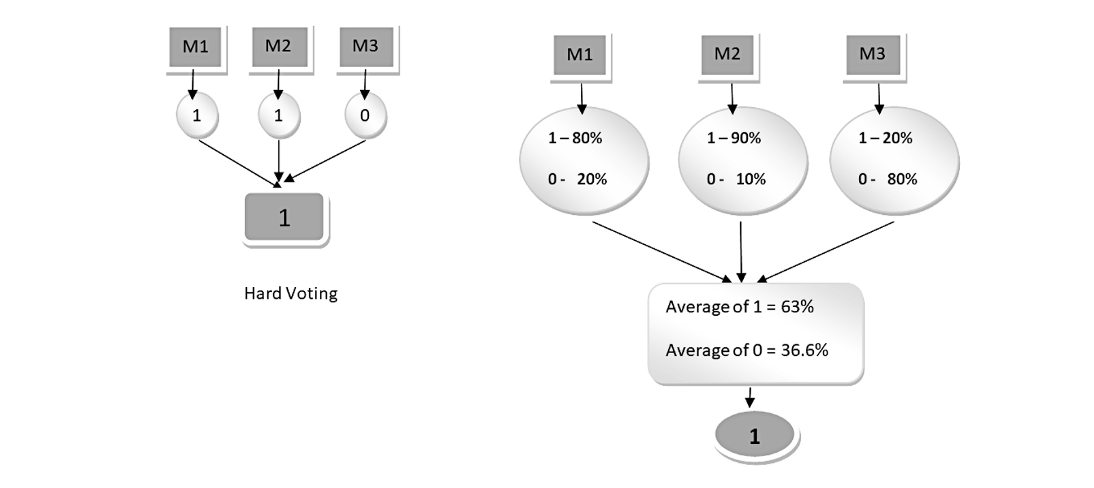

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/Arashlf/UT_ML_Course/main/Homework4/cancer.csv')

In [7]:
df.head(3)

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [25]:
for col in df.columns:
  df = df[pd.to_numeric(df[col], errors='coerce').notnull()]
  df[col] = pd.to_numeric(df[col], downcast="float")

X = df.drop({'Class','Sample Code Number'}, axis=1)
y = df['Class']

In [26]:
models = {"lr":LogisticRegression(), "dtc":DecisionTreeClassifier(), "svm":SVC()}

In [29]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [30]:
S = []
for model_name, model in models.items():
  S.append (cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  print(f'{model_name}\'s accuracy is \n {S[-1]}\n')
  print(f'mean accuracy of {model_name} is  {np.mean(S[-1])}\n\n')

print(f'mean accuracy of all models is {np.mean(S)}')

lr's accuracy is 
 [0.97101449 1.         0.91304348 0.98529412 0.95588235 0.95588235
 0.94117647 0.97058824 0.98529412 1.        ]

mean accuracy of lr is  0.9678175618073315


dtc's accuracy is 
 [0.95652174 0.98550725 0.94202899 0.98529412 0.92647059 0.91176471
 0.94117647 0.94117647 0.97058824 0.94117647]

mean accuracy of dtc is  0.9501705029838023


svm's accuracy is 
 [1.         1.         0.92753623 1.         0.95588235 0.95588235
 0.95588235 0.97058824 0.95588235 1.        ]

mean accuracy of svm is  0.9721653878942881


mean accuracy of all models is 0.9633844842284741


According to the results, SVM has the most accuracy, followed by logistic regression, and then decition tree at the end.